In [59]:
#Market Analysis
#predict gender based on multiple collumns of the data set using linear regresion
#load the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("car_data.csv")
#drop missing values
data.dropna(inplace=True)
data

,Car id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [60]:
#we will not use customer name, date, dealer_name, Dealer_no, phone etc
#clean up gender to 0,1 and transmission to 0,1 and regions to numbers, and engine, and body style
data['Gender']=data['Gender'].astype('category')
data['Gender']=data['Gender'].cat.codes
data['Transmission']=data['Transmission'].astype('category')
data['Transmission']=data['Transmission'].cat.codes
data['Dealer_Region']=data['Dealer_Region'].astype('category')
data['Dealer_Region']=data['Dealer_Region'].cat.codes
data['Engine']=data['Engine'].astype('category')
data['Engine']=data['Engine'].cat.codes
data = data.drop(labels="Date", axis=1)
data = data.drop(labels="Customer Name", axis=1)
data = data.drop(labels="Dealer_Name", axis=1)
data = data.drop(labels="Model", axis=1)
data = data.drop(labels="Phone", axis=1)
data = data.drop(labels="Dealer No", axis=1)
data = data.drop (labels="Car id", axis=1)
#data = data.drop (labels="Annual Income", axis=1)
#data = data.drop (labels="Company", axis=1)
data['Body Style']=data['Body Style'].astype('category')
data['Body Style']=data['Body Style'].cat.codes
data['Company']=data['Company'].astype('category')
data['Company']=data['Company'].cat.codes
data['Color']=data['Color'].astype('category')
data['Color']=data['Color'].cat.codes
data

,Gender,Annual Income,Company,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1,13500,8,0,0,0,26000,3,4
1,1,1480000,7,0,0,0,19000,3,0
2,1,1035000,4,1,1,2,31500,2,2
3,1,13500,27,1,1,1,14000,3,5
4,1,1465000,0,0,0,2,24500,1,3
...,...,...,...,...,...,...,...,...,...
23901,1,13500,21,1,1,2,12000,2,5
23902,0,900000,5,0,0,0,16000,0,4
23903,1,705000,2,1,1,2,21000,4,6
23904,1,13500,5,0,0,0,31000,2,1


In [61]:
data.isnull().sum()

Gender           0
Annual Income    0
Company          0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
dtype: int64

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [63]:
X=data.drop(columns='Gender')
X
y= data['Gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)
lr=LinearRegression()
lr.fit(X_train, y_train)
c = lr.intercept_
c

0.7594176346444981

In [64]:
m=lr.coef_
m

array([ 3.09277216e-08,  2.16228631e-04,  2.30206203e-03,  2.30206203e-03,
       -1.89279283e-03, -1.24056659e-07,  5.46456648e-04,  4.95436891e-04])

In [65]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0.77988182, 0.79197754, 0.78628511, ..., 0.77129333, 0.79077659,
       0.79212459])

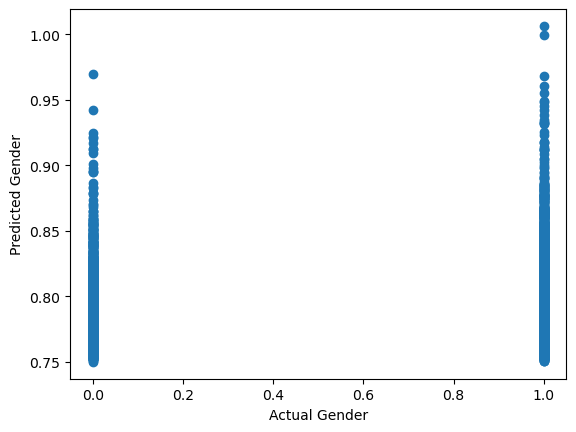

In [66]:
#visualize the prediction
import matplotlib.pyplot as plt
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Gender",)
plt.ylabel("Predicted Gender")
plt.show()

In [67]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.0029970201617138814

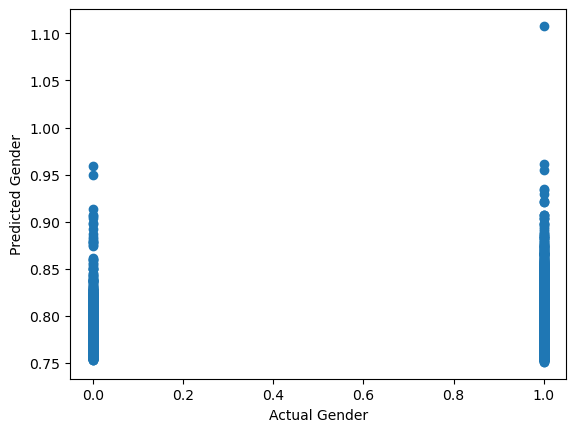

In [68]:
y_pred_test = lr.predict(X_test)
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Gender",)
plt.ylabel("Predicted Gender")
plt.show()

In [69]:
r2_score(y_test, y_pred_test)
#Some fields of study have an inherently greater amount of unexplainable variation. 

0.0029226792591269257